In [4]:
### 곱셈합 구하기 
import numpy as np 
w = np.array([2,3])
x = np.array([4,2])

sum = np.dot(w, x)
print(sum)

14


Text(0, 0.5, 'Prob')

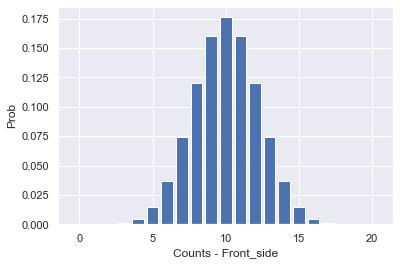

In [12]:
### 동전을 20번 던져서 나오는 확률 분포 그리기 
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.stats 
import seaborn as sns 
sns.set(style='darkgrid')

x = np.arange(0, 21)
y = scipy.stats.binom.pmf(x, 20, 0.5)   ### 20회 던진다 + 확률은 0.5 

plt.bar(x, y)
plt.xlabel('Counts - Front_side')
plt.ylabel('Prob')

Text(0, 0.5, 'Prob')

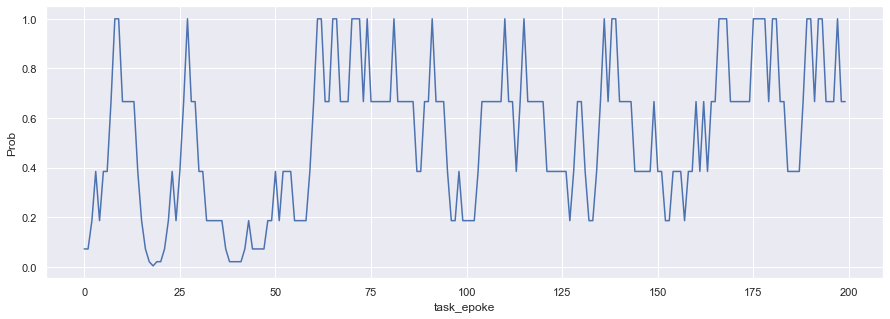

In [13]:
#### 동전던지기를 반복하는 경우 

mu = 0.5   ## 앞면이 나올 확율 
init_sample = list(scipy.stats.bernoulli.rvs(mu, size = 20))

sample = init_sample 
p_value_history = []

for i in range(200): 
    _, p_value = scipy.stats.ttest_1samp(sample[-20:], 0.5)  ## 최근 20회 시행결과 사용 
    p_value_history.append(p_value)    
    sample.append(scipy.stats.bernoulli.rvs(mu))              ## 동전을 다시던진 결과 저장 
    
plt.figure(figsize = (15, 5))
plt.plot(p_value_history)
plt.xlabel('task_epoke')
plt.ylabel('Prob')

Text(0, 0.5, 'P Value')

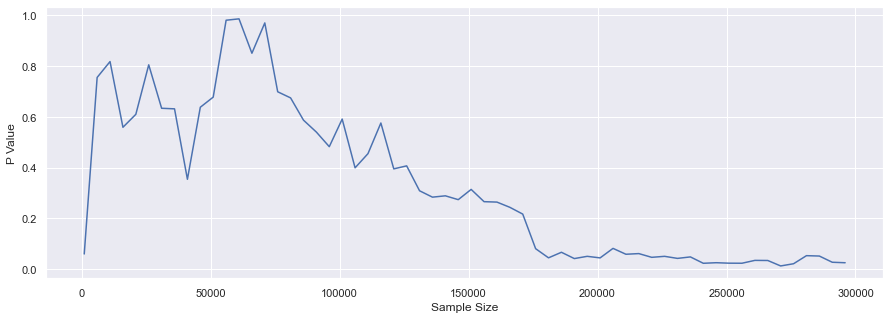

In [17]:
#### 평균 차이가 0.1%에 불과한 두 집단을, 샘플수를 증가시켜 가면서 비교해보기 
max_sample = 300000

#### 샘플 A, B의 평균은 각각 45.1%, 45.2%이다. 
a = scipy.stats.bernoulli.rvs(0.451, size = max_sample)
b = scipy.stats.bernoulli.rvs(0.452, size = max_sample)

p_values = []

#### 샘플수를 5천씩 늘여가면서 검증 수행 
sample_sizes = np.arange(1000, max_sample, 5000)

for sample_size in sample_sizes : 
    _, p_value = scipy.stats.ttest_ind(a[:sample_size], b[:sample_size], equal_var = False)
    p_values.append(p_value)
    
plt.figure(figsize = (15, 5))
plt.plot(sample_sizes, p_values)
plt.xlabel('Sample Size')
plt.ylabel('P Value')